## From the article

# Implementing a distance-based classifier with a quantum interference circuit

###  M. Schuld et al 2017 EPL 119 60002

## Let's try to input more training vectors from the Iris Data Set

# Preparing the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("Iris/iris.data",header=None,names=["f0","f1","f2","f3","class"])

In [5]:
setosa = iris[iris["class"] == "Iris-setosa"]
# setosa.loc[:,"class"] = -1
setosa.loc[:,"color"] = "Green"

In [7]:
versicolor = iris[iris["class"] == "Iris-versicolor"]
# versicolor.loc[:,"class"] = 1
versicolor.loc[:,"color"] = "Blue"

In [8]:
virginica = iris[iris["class"] == "Iris-virginica"]
# virginica.loc[:,"class"] = 1
virginica.loc[:,"color"] = "Red"

In [9]:
data = pd.concat([setosa,versicolor,virginica])

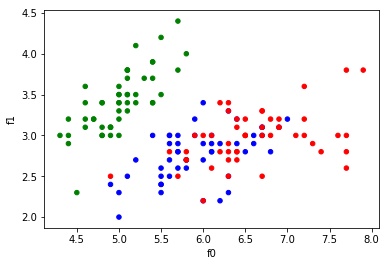

In [11]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [12]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# data.mean()
# data["f0"] -= data.mean()[0]
# data["f1"] -= data.mean()[1]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,["f0","f1","f2","f3"]] = scaler.fit_transform(data.loc[:,["f0","f1","f2","f3"]])

In [14]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


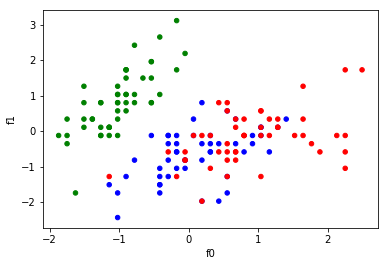

In [15]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [16]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [17]:
for i in data.index:
    v = [data["f0"][i],data["f1"][i],data["f2"][i],data["f3"][i]]
    v = normalize(v)
    data.loc[i,"f0"], data.loc[i,"f1"], data.loc[i,"f2"], data.loc[i,"f3"] = v[0], v[1], v[2], v[3]

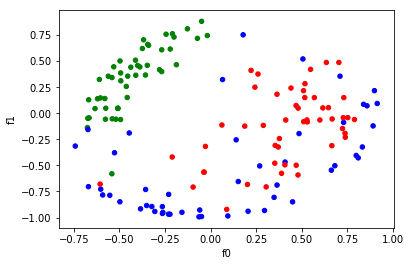

In [20]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [21]:
data[data["class"]=="Iris-setosa"]

,f0,f1,f2,f3,class,color
0,-0.387617,0.444156,-0.577230,-0.565052,Iris-setosa,Green
1,-0.519284,-0.056769,-0.609353,-0.596498,Iris-setosa,Green
2,-0.579648,0.141360,-0.584998,-0.549365,Iris-setosa,Green
3,-0.633543,0.044764,-0.540137,-0.552152,Iris-setosa,Green
4,-0.411600,0.508921,-0.540264,-0.528866,Iris-setosa,Green
5,-0.209190,0.762364,-0.455889,-0.408908,Iris-setosa,Green
6,-0.609692,0.324026,-0.542816,-0.478157,Iris-setosa,Green
7,-0.454320,0.355975,-0.571054,-0.583757,Iris-setosa,Green
8,-0.675218,-0.137588,-0.517854,-0.506929,Iris-setosa,Green
9,-0.508437,0.047349,-0.571330,-0.642520,Iris-setosa,Green


In [22]:
data[data["class"]=="Iris-versicolor"]

,f0,f1,f2,f3,class,color
50,0.898149,0.216508,0.343042,0.169631,Iris-versicolor,Blue
51,0.709505,0.355381,0.443442,0.416732,Iris-versicolor,Blue
52,0.857612,0.071300,0.434739,0.265368,Iris-versicolor,Blue
53,-0.230622,-0.967249,0.076079,0.073856,Iris-versicolor,Blue
54,0.681179,-0.503189,0.409588,0.339166,Iris-versicolor,Blue
55,-0.229816,-0.777766,0.557840,0.176293,Iris-versicolor,Blue
56,0.506140,0.520701,0.489641,0.482643,Iris-versicolor,Blue
57,-0.591590,-0.783277,-0.134994,-0.135185,Iris-versicolor,Blue
58,0.832036,-0.323400,0.434179,0.120903,Iris-versicolor,Blue
59,-0.669610,-0.703672,0.069039,0.227379,Iris-versicolor,Blue


In [23]:
data[data["class"]=="Iris-virginica"]

,f0,f1,f2,f3,class,color
100,0.243076,0.250069,0.559903,0.751590,Iris-virginica,Red
101,-0.036183,-0.564501,0.525629,0.635409,Iris-virginica,Red
102,0.666383,-0.054686,0.532907,0.518607,Iris-virginica,Red
103,0.376967,-0.242777,0.713345,0.538603,Iris-virginica,Red
104,0.412019,-0.064706,0.601103,0.681710,Iris-virginica,Red
105,0.727466,-0.042707,0.552215,0.405003,Iris-virginica,Red
106,-0.605620,-0.679244,0.223363,0.349229,Iris-virginica,Red
107,0.723235,-0.146023,0.592167,0.323954,Iris-virginica,Red
108,0.479130,-0.591743,0.535820,0.364927,Iris-virginica,Red
109,0.547997,0.421191,0.443845,0.570351,Iris-virginica,Red


In [17]:
vectors = data.loc[[33,   85, 145, 28,  36,  50,  53,  149],["f0","f1","f2","f3","class"]]
vectors["label"] = ["t0","t1","t2","x0","x1","x2","x3","x4"]
vectors["class bit"] = ["00","01","10","00","00","01","01","10"]
vectors

,f0,f1,f2,f3,class,label,class bit
33,-0.127009,0.809627,-0.409495,-0.400856,Iris-setosa,t0,00
85,0.178324,0.752125,0.396013,0.495663,Iris-versicolor,t1,01
145,0.528233,-0.063590,0.417101,0.736854,Iris-virginica,t2,10
28,-0.356854,0.366533,-0.614023,-0.601069,Iris-setosa,x0,00
36,-0.187611,0.465434,-0.630528,-0.592122,Iris-setosa,x1,00
50,0.898149,0.216508,0.343042,0.169631,Iris-versicolor,x2,01
53,-0.230622,-0.967249,0.076079,0.073856,Iris-versicolor,x3,01
149,0.061982,-0.112801,0.688551,0.713675,Iris-virginica,x4,10


In [18]:
vectors.iloc[:,0:4].apply(np.arcsin)

,f0,f1,f2,f3
33,-0.127353,0.943517,-0.421901,-0.412451
85,0.179283,0.851281,0.407170,0.518598
145,0.556518,-0.063633,0.430253,0.828405
28,-0.364899,0.375280,-0.661148,-0.644839
36,-0.188729,0.484125,-0.682233,-0.633689
50,1.115542,0.218237,0.350153,0.170455
53,-0.232717,-1.314159,0.076153,0.073923
149,0.062022,-0.113041,0.759489,0.794731


In [57]:
[t0,t1] = data.loc[0:1,"f0":"f3"].apply(np.arcsin).to_numpy()

In [58]:
[t2,t3] = data.loc[50:51,"f0":"f3"].apply(np.arcsin).to_numpy()

In [59]:
[t4,t5] = data.loc[100:101,"f0":"f3"].apply(np.arcsin).to_numpy()

In [60]:
[s0,s1] = data.loc[2:3,"f0":"f3"].apply(np.arcsin).to_numpy()

In [61]:
[ve0,ve1] = data.loc[52:53,"f0":"f3"].apply(np.arcsin).to_numpy()

In [62]:
[vi0,vi1] = data.loc[102:103,"f0":"f3"].apply(np.arcsin).to_numpy()

In [22]:
x0 = vectors.iloc[3:4,0:4].apply(np.arcsin).to_numpy()[0]

In [23]:
x1 = vectors.iloc[4:5,0:4].apply(np.arcsin).to_numpy()[0]

In [24]:
x2 = vectors.iloc[5:6,0:4].apply(np.arcsin).to_numpy()[0]

In [25]:
x3 = vectors.iloc[6:7,0:4].apply(np.arcsin).to_numpy()[0]

In [26]:
x4 = vectors.iloc[7:8,0:4].apply(np.arcsin).to_numpy()[0]

# Building the quantum circuit

To store 4 features I need 2 $i$ qubits.  
To store 3 classes I need 2 $c$ quibits.  
To store 6 training vectors I need 3 $m$ qubits.  
I need some ancilla qubits for the QRAM routine.  
I need one more bit to store the conditional measurement on the rotation qubit. 

In [65]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
import qiskit.aqua.circuits.gates.controlled_ry_gates

In [67]:
def encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits):
    # |00>
    circuit.x(i)
    circuit.mcry(data[0],controls,rotationQubit,ancillaQubits)
    circuit.x(i)
    
    # |01>
    circuit.x(i[1])
    circuit.mcry(data[1],controls,rotationQubit,ancillaQubits)
    circuit.x(i[1])
    
    # |10>
    circuit.x(i[0])
    circuit.mcry(data[2],controls,rotationQubit,ancillaQubits)
    circuit.x(i[0])
    
    # |11>
    circuit.mcry(data[3],controls,rotationQubit,ancillaQubits)

In [130]:
a = QuantumRegister(1,'a') # knn ancilla
m = QuantumRegister(3,'m') # training vector index
i = QuantumRegister(2,'i') # feature index
r = QuantumRegister(1,'r') # rotation qubit
q = QuantumRegister(6,'q') # qram ancilla
c = QuantumRegister(2,'c') # class
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

circuit.barrier()

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,t5,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

circuit.barrier()

# >>> Encode the first training vector >>>

# |c> = |00>
# |m> = |000>

circuit.x(c)
circuit.x(m)

encodeVector(circuit,t0,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c)
circuit.x(m)

# <<< Encode the first training vector <<<

circuit.barrier()

# >>> Encode the second training vector >>>

# |c> = |00>
# |m> = |001>

circuit.x(c)
circuit.x(m[1])
circuit.x(m[2])

encodeVector(circuit,t1,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c)
circuit.x(m[1])
circuit.x(m[2])

# <<< Encode the second training vector <<<

circuit.barrier()

# >>> Encode the third training vector >>>

# |c> = |01>
# |m> = |010>

circuit.x(c[1])
circuit.x(m[0])
circuit.x(m[2])

encodeVector(circuit,t2,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[1])
circuit.x(m[0])
circuit.x(m[2])

# <<< Encode the third training vector <<<

circuit.barrier()

# >>> Encode the fourth training vector >>>

# |c> = |01>
# |m> = |011>

circuit.x(c[1])
circuit.x(m[2])

encodeVector(circuit,t3,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[1])
circuit.x(m[2])

# <<< Encode the fourth training vector <<<

circuit.barrier()

# >>> Encode the fifth training vector >>>

# |c> = |10>
# |m> = |100>

circuit.x(c[0])
circuit.x(m[0])
circuit.x(m[1])

encodeVector(circuit,t4,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[0])
circuit.x(m[0])
circuit.x(m[1])

# <<< Encode the fifth training vector <<<

circuit.barrier()

# >>> Encode the sixth training vector >>>

# |c> = |10>
# |m> = |101>

circuit.x(c[0])
circuit.x(m[1])

encodeVector(circuit,t5,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[0])
circuit.x(m[1])

# <<< Encode the sixth training vector <<<

circuit.barrier()

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')


Total counts are: {'0001': 55, '0100': 3936, '1111': 71, '0011': 111, '0000': 3829, '1100': 3872, '1000': 4058, '1001': 113, '0101': 89, '1101': 83, '1110': 3, '0111': 98, '1010': 2, '1011': 64}


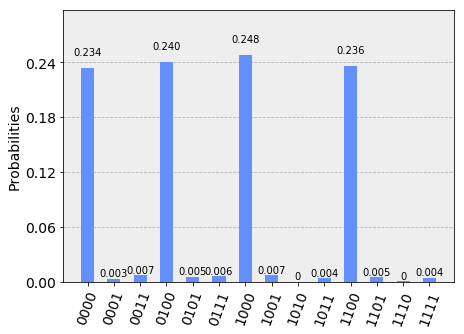

In [137]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=16384)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
plot_histogram(counts)

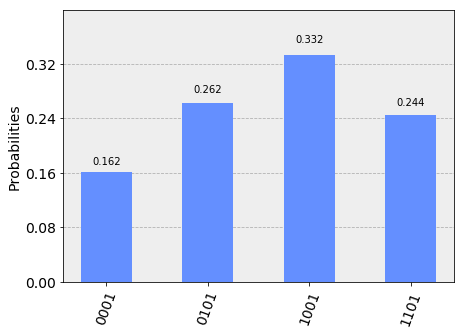

In [138]:
goodCounts = {k: counts[k] for k in counts.keys() & {'0001','0101','1001','1101'}}
plot_histogram(goodCounts)